In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Acquistion and Wrangling

In [2]:
df = pd.read_csv(r"C:\Users\birle\Downloads\Processed_Flipdata - Processed_Flipdata.csv")

In [3]:
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


In [6]:
# Converting the 'Prize' column from object dtype to integer dtype
df['Prize'] = df['Prize'].str.replace(',','').astype('Int64')

# ENCODING -- To convert the Categorical values in the columns into Numerical values

In [8]:
# Identifying Unique values in 'Model' column for encoding
df['Model'].unique

<bound method Series.unique of 0            Infinix SMART 7
1            Infinix SMART 7
2               MOTOROLA G32
3                   POCO C50
4            Infinix HOT 30i
               ...          
536    SAMSUNG Galaxy S23 5G
537                 LAVA Z21
538           Tecno Spark 8T
539    SAMSUNG Galaxy A54 5G
540                 OPPO A77
Name: Model, Length: 541, dtype: object>

In [9]:
# Identifying Unique values in 'Colour' column for encoding
df['Colour'].unique

<bound method Series.unique of 0         Night Black
1          Azure Blue
2        Mineral Gray
3          Royal Blue
4            Marigold
            ...      
536             Cream
537              Cyan
538    Turquoise Cyan
539      Awesome Lime
540          Sky Blue
Name: Colour, Length: 541, dtype: object>

In [10]:
df['Processor_'].unique

<bound method Series.unique of 0       Unisoc Spreadtrum SC9863A1
1       Unisoc Spreadtrum SC9863A1
2          Qualcomm Snapdragon 680
3               Mediatek Helio A22
4                              G37
                  ...             
536    Qualcomm Snapdragon 8 Gen 2
537                      Octa Core
538             MediaTek Helio G35
539        Exynos 1380, Octa Core 
540             Mediatek Helio G35
Name: Processor_, Length: 541, dtype: object>

In [12]:
from sklearn.preprocessing import OrdinalEncoder

In [13]:
# Creating an object named 'encoder' to perform Ordinal Encoding
encoder = OrdinalEncoder()

In [14]:
columns_to_encode = ['Model','Colour','Processor_']

In [15]:
# Encoding the 'Model','Colour', and 'Processor_' column
df[columns_to_encode] = encoder.fit_transform(df[columns_to_encode])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    float64
 2   Colour         541 non-null    float64
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    float64
 11  Prize          541 non-null    Int64  
dtypes: Int64(1), float64(4), int64(5), object(2)
memory usage: 51.4+ KB


In [17]:
# Converting 'Rear Camera' and 'Front Camera' columns from object dtype to integer dtype
df['Rear Camera'] = df['Rear Camera'].str.replace('MP', '').astype('Int64')
df['Front Camera'] = df['Front Camera'].str.replace('MP', '').astype('Int64')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    float64
 2   Colour         541 non-null    float64
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    Int64  
 7   Front Camera   541 non-null    Int64  
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    float64
 11  Prize          541 non-null    Int64  
dtypes: Int64(3), float64(4), int64(5)
memory usage: 52.4 KB


In [19]:
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,23.0,159.0,64,4,6000,13,5,1,16.76,113.0,7299
1,1,23.0,20.0,64,4,6000,13,5,1,16.76,113.0,7299
2,2,37.0,149.0,128,8,5000,50,16,0,16.64,75.0,11999
3,3,69.0,201.0,32,2,5000,8,5,0,16.56,56.0,5649
4,4,12.0,130.0,128,8,5000,50,5,1,16.76,14.0,8999
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,118.0,49.0,256,8,3900,50,12,0,15.49,89.0,79999
537,638,32.0,52.0,32,2,3100,5,2,0,12.70,68.0,5998
538,639,123.0,259.0,64,4,5000,50,8,0,16.76,35.0,9990
539,641,110.0,17.0,128,8,5000,50,32,0,16.26,11.0,38999


In [20]:
# Dropping unnecessary column 'Unnamed: 0'
df.drop(['Unnamed: 0'],axis=1,inplace=True)

# Analysing Correlation between 'Prize' (Target feature) and Independent Features 

In [24]:
df.corr(numeric_only = True)['Prize'].sort_values(ascending=False)

Prize            1.000000
Memory           0.566660
Front Camera     0.532321
RAM              0.532024
Rear Camera      0.410367
Mobile Height    0.176009
Colour           0.038895
Battery_        -0.034297
Processor_      -0.050244
Model           -0.075163
AI Lens         -0.153691
Name: Prize, dtype: float64

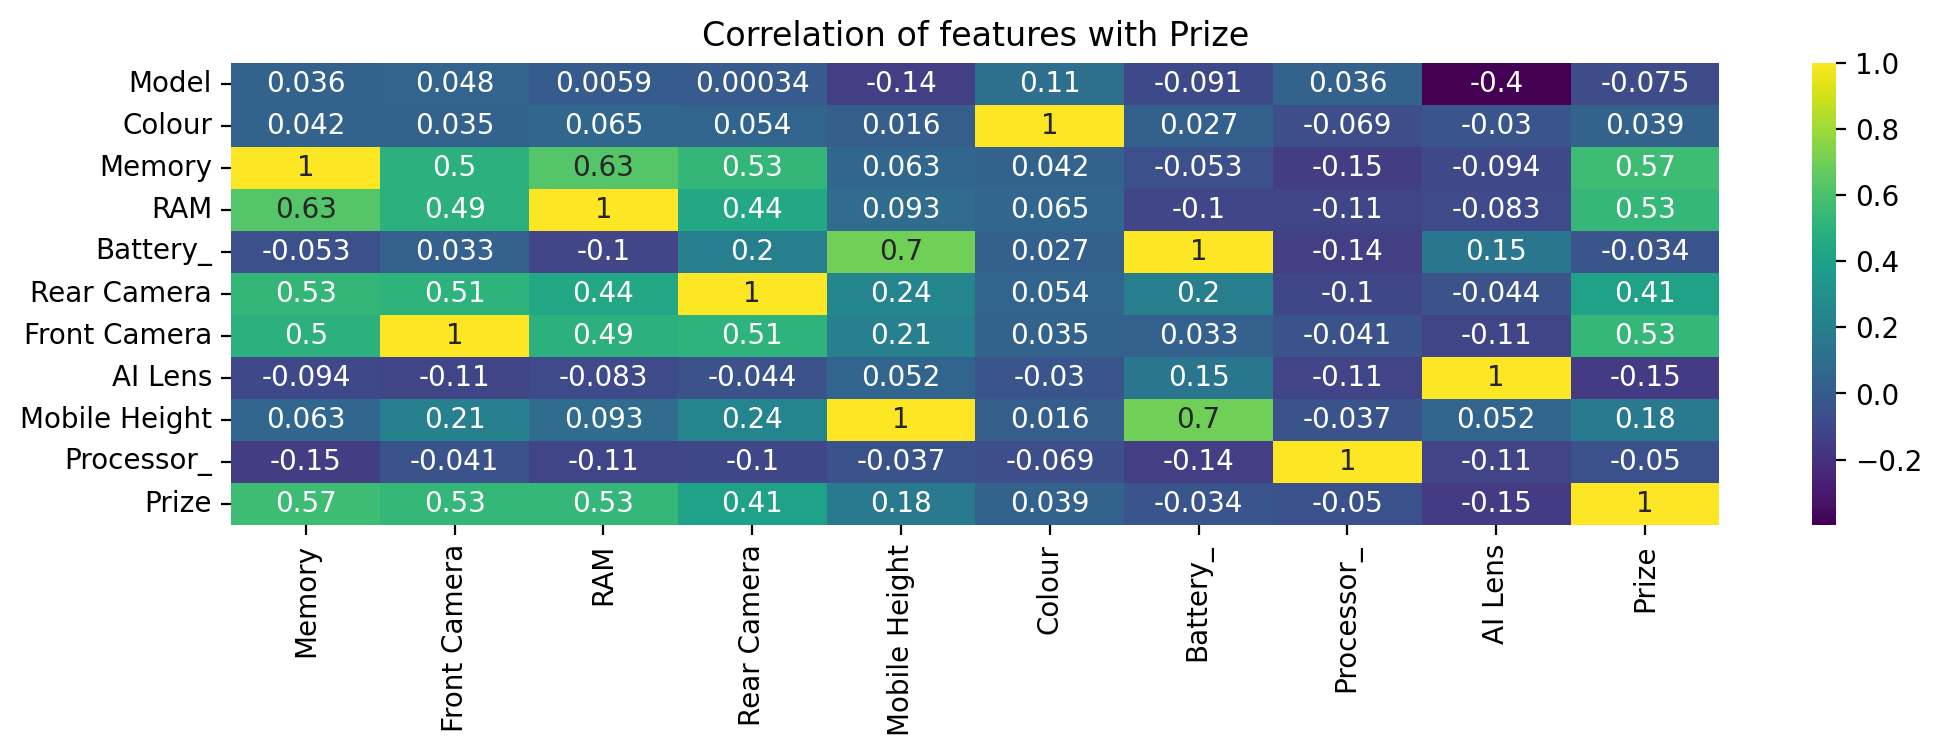

In [27]:
# Visual analysis of correlation through heatmap
plt.figure(figsize=(12,3),dpi=200)
sns.heatmap(df.corr(numeric_only=True)[['Memory','Front Camera','RAM','Rear Camera','Mobile Height','Colour','Battery_','Processor_','AI Lens','Prize']],annot=True,cmap='viridis')
plt.title('Correlation of features with Prize')
plt.show()

# Conclusion -- Top 5 features affecting Price are Memory, Front Camera, RAM, Rear Camera and Mobile Height

# Identifying and treating the Outliers in the dataset 

In [29]:
# Identifying Outliers through Quantile Method
q1 = df['Prize'].quantile(0.25)
q3 = df['Prize'].quantile(0.75)
IQR = q3 - q1
outliers = df[(df['Prize'] <= (q1 - 1.5*IQR)) | (df['Prize'] >= (q3 + 1.5*IQR))]

In [30]:
outliers

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
222,117.0,181.0,128,8,4500,50,10,0,16.76,88.0,49999
286,119.0,181.0,128,8,3300,12,10,0,17.02,97.0,44999
305,34.0,47.0,128,8,4400,50,32,0,16.64,96.0,34999
308,5.0,209.0,128,8,4300,64,13,0,15.49,108.0,43999
309,5.0,37.0,128,8,4300,64,13,0,15.49,108.0,43999
327,5.0,217.0,128,8,4300,64,13,0,15.49,108.0,43999
396,176.0,129.0,256,4,4600,50,50,0,17.22,48.0,36999
400,35.0,107.0,256,4,4610,200,60,0,16.94,90.0,49999
416,4.0,217.0,128,8,4270,50,8,0,16.00,16.0,55999
417,4.0,165.0,128,8,4270,50,8,0,16.00,16.0,55999


In [31]:
# Removing the outliers
df.drop((outliers.index),inplace=True)

In [32]:
df

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,23.0,159.0,64,4,6000,13,5,1,16.76,113.0,7299
1,23.0,20.0,64,4,6000,13,5,1,16.76,113.0,7299
2,37.0,149.0,128,8,5000,50,16,0,16.64,75.0,11999
3,69.0,201.0,32,2,5000,8,5,0,16.56,56.0,5649
4,12.0,130.0,128,8,5000,50,5,1,16.76,14.0,8999
...,...,...,...,...,...,...,...,...,...,...,...
534,55.0,96.0,64,4,5000,50,8,0,16.55,68.0,9790
535,104.0,119.0,64,3,5000,13,5,0,16.51,65.0,9999
537,32.0,52.0,32,2,3100,5,2,0,12.70,68.0,5998
538,123.0,259.0,64,4,5000,50,8,0,16.76,35.0,9990


In [41]:
# Analysing numerical features of the Columns
df.describe()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.0,516.0,516.000000,516.000000,516.000000,516.0
mean,98.984496,134.546512,107.968992,5.319767,4898.207364,45.651163,11.478682,0.065891,16.433760,61.339147,14590.631783
std,51.334878,78.976682,59.144968,1.964855,780.082852,30.256868,8.266997,0.248333,2.580542,31.833293,7292.518114
min,3.000000,0.000000,16.000000,2.000000,800.000000,0.0,0.0,0.000000,4.500000,0.000000,920.0
25%,58.000000,66.750000,64.000000,4.000000,5000.000000,13.0,5.0,0.000000,16.510000,41.000000,8999.0
50%,99.000000,132.500000,128.000000,5.000000,5000.000000,50.0,8.0,0.000000,16.710000,59.000000,12999.0
75%,143.250000,199.000000,128.000000,8.000000,5000.000000,50.0,16.0,0.000000,16.842500,80.000000,17999.0
max,186.000000,274.000000,256.000000,8.000000,7000.000000,200.0,60.0,1.000000,41.940000,122.000000,33367.0


# Visual Representation of the Most demanding specification of the mobiles through Countplot

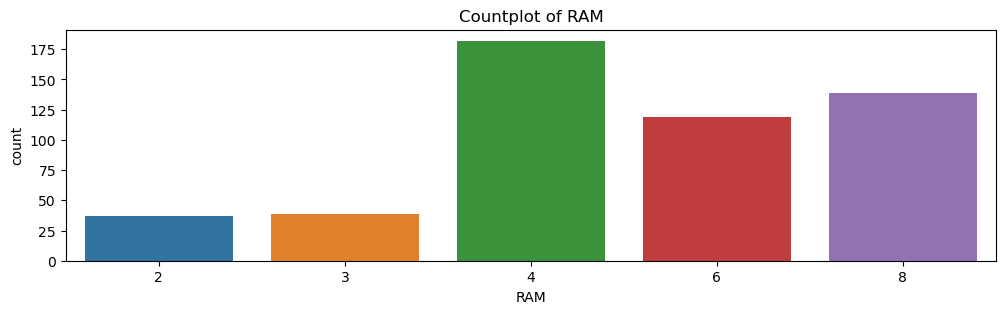

In [38]:
# Countplot of RAM
plt.figure(figsize=(12,3),dpi=100)
sns.countplot(data=df,x='RAM')
plt.title('Countplot of RAM')
plt.show()

# CONCLUSION -- 4GB RAM is most in demand followed by 8GB,then 6GB RAM

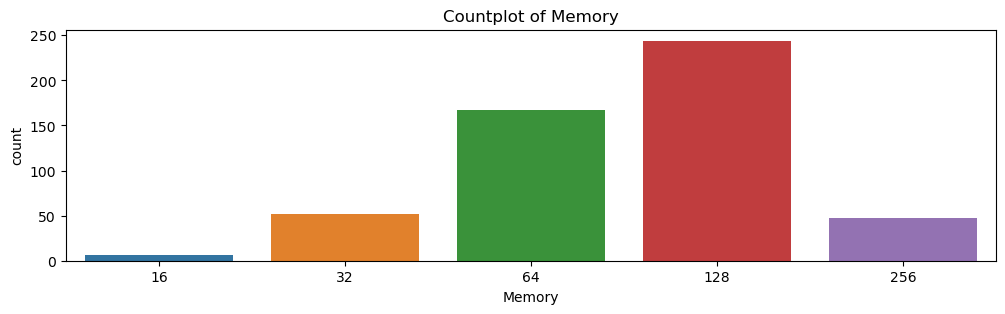

In [39]:
# Countplot of Memory
plt.figure(figsize=(12,3),dpi=100)
sns.countplot(data=df,x='Memory')
plt.title('Countplot of Memory')
plt.show()

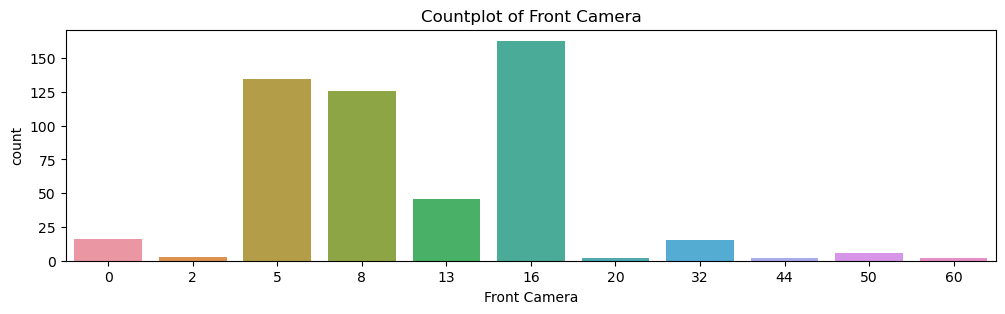

In [40]:
# Countplot of Front Camera
plt.figure(figsize=(12,3),dpi=100)
sns.countplot(data=df,x='Front Camera')
plt.title('Countplot of Front Camera')
plt.show()

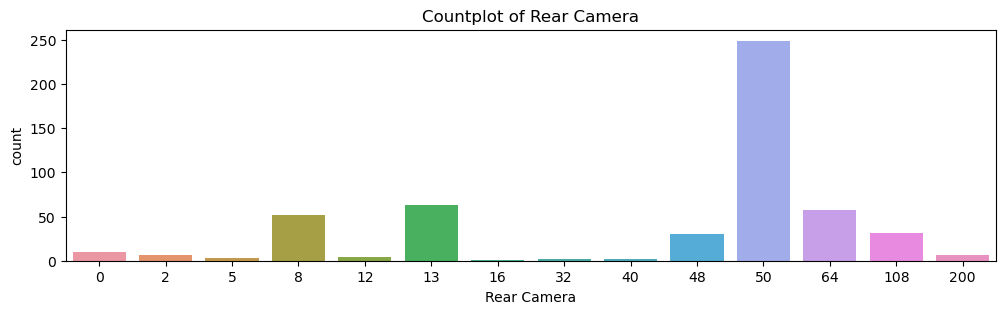

In [129]:
# Countplot of Rear Camera
plt.figure(figsize=(12,3),dpi=100)
sns.countplot(data=df,x='Rear Camera')
plt.title('Countplot of Rear Camera')
plt.show()

# Splitting the Data for Training and Testing

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Splitting the data into X (Represents Independent Features) and y (Represents Target feature,that is,'Prize')
X = df.drop(['Prize','Model'],axis=1)
y = df['Prize']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

# Price Prediction through RandomForestClassifier Model

In [50]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)



RandomForestClassifier()

In [52]:
# Checking the accuracy of the model
clf_score = clf.score(X_test,y_test)

In [53]:
clf_score

0.625

In [56]:
# Making the Price Predictions
clf_y_pred = clf.predict(X_test)
clf_y_pred

array([20999., 30999.,  9499., 11499.,  8999., 21999.,  9499., 17999.,
       10999.,  9999., 13999., 32999.,  5990., 14999., 23999., 10499.,
       13999.,  8999., 23999., 30999., 16999.,  6299., 16999.,  8999.,
       14999., 19999., 10999.,  2615., 17999., 23999.,  9699., 10499.,
       23999., 12499.,  6794., 14999.,  7299., 16999.,  9999., 16499.,
       13999., 10999., 16499., 19979.,  6999.,  7999., 29999.,  8999.,
        9499., 14499., 23999.,  7749.,  9999.,  8499., 23999.,  9499.,
         920.,  7299., 10699., 23999., 12999.,  7999.,  7280., 14499.,
       20999., 22999., 14499.,  6299., 18999., 12999., 10999., 32999.,
        7999., 13490.,  5999., 17999., 17999.,  7999., 18999., 12499.,
       32999., 17999.,  8999., 17499.,  6299.,  9499., 15999.,  9999.,
        9999.,  8749.,  8460., 16999.,  6799.,  5999., 17999., 13999.,
        1299., 11999., 23999., 10999.,  7990., 16499., 21999.,  9999.])

In [57]:
# Evaluation of the model through different metrics
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,r2_score

In [60]:
# Identifying the Mean Absolute Error
clf_mae = mean_absolute_error(y_test,clf_y_pred)
clf_mae

1233.1057692307693

In [63]:
# Identifying the Mean Squared Error
clf_mse = mean_squared_error(y_test,clf_y_pred)
clf_mse

11164386.048076924

In [65]:
# Checking the r2 score of the model
clf_r2 = r2_score(y_test,clf_y_pred)
clf_r2

0.8210650321690373

# Price Prediction through LogisticRegression Model

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\birle\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
# Checking the Model Score
lr_score = lr.score(X_test,y_test)
lr_score

0.08653846153846154

In [106]:
# Making Price Predictions
lr_pred_y = lr.predict(X_test)
lr_pred_y

array([16999., 14490., 12999., 11999., 11999., 16999.,  7299., 16999.,
       11999.,  8999., 15999., 29999.,  6999., 11999., 17999.,  8999.,
       16999., 11999., 23999., 14490., 15999.,  9999., 16999.,  7999.,
       11999., 15999.,  6999.,  1299., 15999., 15999.,  8999., 16999.,
       29999.,  8999.,  8999.,  8999.,  8999., 15999.,  9999., 16999.,
       15999., 13999.,  8999., 15999.,  8999.,  8999., 29999.,  9999.,
        9999., 16999., 23999.,  8999.,  9999.,  6999., 16499.,  9999.,
        6999.,  7299., 13999., 23999., 23999.,  8999.,  6999., 16999.,
       20999., 15999., 23999.,  9999., 15999., 15999., 11999., 29999.,
        8999., 13999.,  9999., 16999., 29999.,  7999., 16999.,  9999.,
       29999., 17999., 11999., 16999.,  8999.,  8999., 16999., 15999.,
        9999.,  9999.,  7299., 16999.,  9999.,  8999., 29999., 15999.,
        1299., 15999., 23999., 11999.,  8999., 15999., 16999.,  7999.])

In [109]:
# Identiying Mean absolute Error
lr_mae = mean_absolute_error(y_test,lr_pred_y)
lr_mae

3071.3076923076924

In [110]:
# Identifying Mean Squared Error
lr_mse = mean_squared_error(y_test,lr_pred_y)
lr_mse

21405617.576923076

In [113]:
# r2 Score
lr_r2 = r2_score(y_test,lr_pred_y)
lr_r2

0.6569257390388807

# Price Prediction through K-Nearest Neighbor(KNN) Model

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [72]:
knn_score = knn.score(X_test,y_test)
knn_score

0.08653846153846154

In [115]:
knn_y_pred = knn.predict(X_test)
knn_y_pred

array([10699., 10548.,  8999.,  9999.,  6999., 11999.,  6799., 11999.,
       12499., 12499.,  8999., 29999.,  6999., 14999., 23999.,  5649.,
       15999.,  6999., 13489., 10548., 15999.,  1375., 12999.,  8499.,
       12499., 15999.,  6299.,  2499., 12999., 23999.,  8499., 15499.,
       29999., 12499.,  6794.,  7999.,  6999., 13999.,  9999., 15999.,
        8999., 14490.,  7749., 13499.,  6299.,  7999., 21999.,  9499.,
        6999., 16999., 16999., 12499.,  9999.,  6999., 17999.,  9499.,
         920.,  8999., 14490., 15999., 15999.,  7993.,  5649., 11999.,
       23999., 13999., 14499.,  6999., 12999.,  8999.,  9999., 29999.,
        7999., 14490.,  5999., 15999., 29999.,  7749., 15999.,  9999.,
       17999., 26999.,  9499., 12999.,  6299.,  6299., 11999.,  8999.,
        9999.,  6199.,  6799., 15999.,  6299.,  7999., 29999.,  8999.,
        1299., 13999., 24999., 11999.,  5649., 12999.,  8999.,  7749.])

In [116]:
knn_mae = mean_absolute_error(y_test,knn_y_pred)
knn_mae

3367.2403846153848

In [117]:
knn_mse = mean_squared_error(y_test,knn_y_pred)
knn_mse

27800659.951923076

In [119]:
knn_r2 = r2_score(y_test,knn_y_pred)
knn_r2

0.5544304744788222

# Price Prediction through LinearRegression

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [75]:
lin_reg_score = lin_reg.score(X_test,y_test)
lin_reg_score

0.7022388670696789

In [76]:
lin_reg_y_pred = lin_reg.predict(X_test)
lin_reg_y_pred

array([19854.59719425, 17444.16971914, 13180.44500886,  7669.73175887,
        8896.07017694, 15545.48331138,  9322.82462324, 18781.92996701,
       11971.04337364, 11435.02018736, 14878.16483157, 25539.41841005,
        6790.61404234, 11531.70667596, 24229.52321716,  7184.75340219,
       19177.65746944,  8896.07017694, 18704.88715955, 17444.22432196,
       19553.50726986,  3346.75599953, 17569.13143017,  8880.2027921 ,
       13409.34289143, 21193.98441754,  7175.19790823,  4554.56656715,
       15951.42192671, 18795.83581654, 11559.07952287, 13691.21993183,
       26565.63683992, 10531.21951919,  8665.84254025, 10098.93666586,
        9188.82336398, 14963.9423897 , 11008.93299829, 27248.909954  ,
       15033.6136029 , 15317.60671167, 13536.30954674, 18351.17696745,
        7654.86096697,  6974.28541322, 27416.4558225 ,  8870.15587274,
        8304.30279458, 15400.30655627, 26551.16709193, 10676.1709324 ,
       11861.37816931,  9419.136933  , 19104.75940319, 11286.42291292,
      

In [78]:
lin_reg_mae = mean_absolute_error(y_test,lin_reg_y_pred)
lin_reg_mae

2929.739706826701

In [79]:
lin_reg_mse = mean_squared_error(y_test,lin_reg_y_pred)
lin_reg_mse

18578371.116859015

In [80]:
lin_reg_r2 = r2_score(y_test,lin_reg_y_pred)
lin_reg_r2

0.7022388670696789

# Price Prediction through GradientBoostingRegressor Model

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [96]:
LR = {'n_estimators':[100,150,200,250],'max_depth':[1,2,3,4]}
tuning = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=LR,scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_,tuning.best_score_

({'max_depth': 4, 'n_estimators': 250}, 0.9017406174944738)

In [97]:
gbr = GradientBoostingRegressor(n_estimators=250,max_depth=4)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=250)

In [98]:
gbr_y_pred = gbr.predict(X_test)
gbr_y_pred

array([17524.25279409, 30373.74552877, 10162.79284902, 10982.794048  ,
        9093.76546327, 21667.29555864,  8378.93798541, 17388.00567512,
       10142.36797067,  9484.32848716, 14425.30438991, 29203.7815418 ,
        6782.17275506, 14043.13988302, 24161.24098906,  9836.02985643,
       13589.98581948,  9093.76546327, 23588.4005626 , 30847.30850605,
       16060.18945946,  6049.07160535, 16774.62716177,  9546.46934015,
       12215.95043087, 19251.7717036 , 10595.98181378,  1769.58216795,
       17457.10890942, 23894.76123838,  9903.98353041, 10457.51340127,
       25251.64103845, 11421.57717333,  8331.23917404, 12332.50499694,
        9506.18692821, 13761.56367862,  9747.55177562, 16839.16671618,
       13639.09290839, 10683.87547144, 13433.89896659, 17092.90462791,
        7067.22721386,  8281.59082695, 30268.25686185,  9703.50123528,
        8109.97823714, 15784.37459838, 24494.60551478,  7999.69593717,
       10215.78511993,  8167.15163099, 23669.44378206,  9862.75629039,
      

In [121]:
gbr_score = gbr.score(X_test,y_test)
gbr_score

0.885779345459736

In [122]:
gbr_mae = mean_absolute_error(y_test,gbr_y_pred)
gbr_mae

1258.0519593496588

In [123]:
gbr_mse = mean_squared_error(y_test,gbr_y_pred)
gbr_mse

7126630.962128111

In [124]:
gbr_r2 = r2_score(y_test,gbr_y_pred)
gbr_r2

0.885779345459736

# Price Prediction through GradientBoostingClassifier

In [133]:
from sklearn.ensemble import GradientBoostingClassifier

In [136]:

gbc = GradientBoostingClassifier(n_estimators = 250,max_depth=4)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=250)

In [137]:
# Making Price Prediction
gbc_pred_y = gbc.predict(X_test)
gbc_pred_y

array([20999., 30999.,  9499., 11499.,  8999., 21999.,  7299., 17999.,
       10999.,  9999., 13999., 32299.,  6999., 14999., 23999., 10499.,
       13999.,  8999., 23999., 30999., 16999.,  3549., 16999.,  8999.,
       12999., 19999., 10999.,  2615., 17999., 23999., 11762., 10499.,
       23999., 12499.,  6794., 12599.,  9999., 13999.,  9999., 16499.,
       13999., 10999., 11999., 12999.,  6999.,  7999., 29999.,  8999.,
        9499., 16999., 23999.,  7749.,  9999.,  8499., 23999.,  9499.,
         920.,  7299., 13999., 23999., 12999.,  7999.,  8999., 15999.,
       20999., 22999., 14499.,  6299., 18999., 12999., 10999., 32999.,
        7999., 13490.,  5999., 13999., 30999.,  7999., 18999., 12499.,
        8990., 18999.,  8999., 16999.,  6299.,  9499., 15999.,  9999.,
       10699.,  9999.,  7245., 16999.,  3549.,  5999., 30999., 13999.,
        1299., 11999., 23999., 12599.,  7990., 16499., 16999.,  9999.])

In [138]:
# Checking accuracy of the model
gbc_acc = accuracy_score(y_test,gbc_pred_y)
gbc_acc

0.5576923076923077

In [139]:
gbc_mae = mean_absolute_error(y_test,gbc_pred_y)
gbc_mae

974.9038461538462

In [141]:
gbc_mse = mean_squared_error(y_test,gbc_pred_y)
gbc_mse

5241187.807692308

In [142]:
gbc_r2 = r2_score(y_test,gbc_pred_y)
gbc_r2

0.9159979090899495

# Final Analysis of all the Models through a DataFrame

In [147]:
compare_models = pd.DataFrame({
    'Model': ['RandomForest','KNN','LogisticRegression','LinearRegression','GradientBoostingRegressor','GradientBoostingClassifier'],
    'Score': [clf_score,knn_score,lr_score,lin_reg_score,gbr_score,gbc_acc],
    'MAE':   [clf_mae,knn_mae,lr_mae,lin_reg_mae,gbr_mae,gbc_mae],
    'r2 score': [clf_r2,knn_r2,lr_r2,lin_reg_r2,gbr_r2,gbc_r2],
})

print(compare_models)

                        Model     Score          MAE  r2 score
0                RandomForest  0.625000  1233.105769  0.821065
1                         KNN  0.086538  3367.240385  0.554430
2          LogisticRegression  0.086538  3071.307692  0.656926
3            LinearRegression  0.702239  2929.739707  0.702239
4   GradientBoostingRegressor  0.885779  1258.051959  0.885779
5  GradientBoostingClassifier  0.557692   974.903846  0.915998


In [ ]:
# Thus, it is Clear that GradientBoostingRegressor Model is the Most accurate Model based on different Evaluation metrics

# Final Price Prediction through GradientBoostingRegressor Model

In [125]:
from joblib import dump,load

In [128]:
dump(gbr,'price of the mobile')
mobile_price = load('price of the mobile')


In [131]:
# Predicting the Price of the mobile with most demanding specifications
most_demanding_specs = [[4,128,16,50,1,60,135,16.43,5000]]
mobile_price.predict(most_demanding_specs)

C:\Users\birle\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([14150.41623128])

In [132]:
df['Prize'].mean()

14590.631782945737

# CONCLUSION -- The predicted Price of the Mobile with the most demanding features such as 4GB RAM ,128GB Memory, 16 Megapixel front camera, 50 Megapixel rear camera is Rs 14150 which is quite near to the mean price given in the dataset,that is, Rs 14590